In [1]:
pip install pandas matplotlib seaborn scipy


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import platform
import os

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("="*60)
print("1회차 실습 과제: 통계적 사고와 기술통계")
print("="*60)


1회차 실습 과제: 통계적 사고와 기술통계


In [3]:
# 데이터 로드
DATA_PATH = os.path.join('data', '차량_연비_데이터(20022022).csv')
df = pd.read_csv(DATA_PATH)

# 데이터 기본 검증
df.info()
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             22556 non-null  int64  
 1   MAKE             22556 non-null  str    
 2   MODEL            22556 non-null  str    
 3   VEHICLE CLASS    22556 non-null  str    
 4   ENGINE SIZE      22556 non-null  float64
 5   CYLINDERS        22556 non-null  int64  
 6   TRANSMISSION     22556 non-null  str    
 7   FUEL             22556 non-null  str    
 8   CITY (L/100 km)  22556 non-null  float64
 9   HWY (L/100 km)   22556 non-null  float64
 10  COMB (L/100 km)  22556 non-null  float64
 11  COMB (mpg)       22556 non-null  int64  
 12  EMISSIONS        22556 non-null  int64  
dtypes: float64(4), int64(4), str(5)
memory usage: 2.2 MB


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [4]:
# 데이터 전처리
df['VEHICLE CLASS'] = (df['VEHICLE CLASS']
                       .str.upper()
                       .str.replace(':', ' -')
                       .str.replace('  ', ' ')
                       .str.strip())

# 범주 값별 빈도 확인
df['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
COMPACT                     3127
MID-SIZE                    2960
SUV                         2640
PICKUP TRUCK - STANDARD     2204
SUBCOMPACT                  2010
SUV - SMALL                 1756
FULL-SIZE                   1503
TWO-SEATER                  1312
SUV - STANDARD              1122
MINICOMPACT                  994
STATION WAGON - SMALL        877
PICKUP TRUCK - SMALL         511
MINIVAN                      408
STATION WAGON - MID-SIZE     387
VAN - CARGO                  332
VAN - PASSENGER              299
SPECIAL PURPOSE VEHICLE      114
Name: count, dtype: int64

In [8]:
df['EMISSIONS']

0        186
1        175
2        230
3        264
4        198
        ... 
22551    219
22552    219
22553    232
22554    236
22555    252
Name: EMISSIONS, Length: 22556, dtype: int64

In [22]:
# TODO 1: 기본 대표값 계산 (산술평균, 중앙값, 최빈값)
df_em = df['EMISSIONS']
print(f'산술평균: {df_em.mean():.2f}')
print(f'중앙값: {df_em.median()}')
print(f'최빈값: {df_em.mode().values}')

# TODO 2: 절사평균 계산
print(f'절사평균(10%): {stats.trim_mean(df_em, 0.1):.2f}')
print(f'절사평균(20%): {stats.trim_mean(df_em, 0.2):.2f}')

# TODO 3: 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
class_mean = df.groupby('VEHICLE CLASS')['EMISSIONS'].mean()
target = ['COMPACT', 'MID-SIZE', 'SUV']
filtered_means = class_mean.loc[target]
weights = np.array([50, 30, 20])
weighted_mean = np.average(filtered_means, weights=weights)
print(f'가중평균: {weighted_mean:.2f}')

# TODO 4: 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
comparison_df = df[df['VEHICLE CLASS'].isin(target)].groupby('VEHICLE CLASS')['EMISSIONS'].agg(['mean', 'median'])
display(comparison_df.round(2))

# TODO 5: 결과 해석 (print문으로 작성)
print('전체적으로 봤을 때, 산술평균이 가장 높다.\n차 크기별로 비교했을 때 크기가 커질수록 평균과 중앙값이 증가한다')

산술평균: 250.07
중앙값: 243.0
최빈값: [221]
절사평균(10%): 247.34
절사평균(20%): 245.40
가중평균: 226.94


,mean,median
VEHICLE CLASS,,
COMPACT,211.54,207.0
MID-SIZE,223.70,221.0
SUV,270.30,267.0


전체적으로 봤을 때, 산술평균이 가장 높다.
차 크기별로 비교했을 때 크기가 커질수록 평균과 중앙값이 증가한다


분산
COMB (L/100 km)    8.473079
ENGINE SIZE        1.783281
dtype: float64

표준편차
COMB (L/100 km)    2.910855
ENGINE SIZE        1.335396
dtype: float64

범위(max-min)
COMB (L/100 km)    22.5
ENGINE SIZE         7.6
dtype: float64

IQR
COMB (L/100 km)    3.6
ENGINE SIZE        1.9
dtype: float64

CV
COMB (L/100 km)    0.263800
ENGINE SIZE        0.397836
dtype: float64
IQR 이상치 개수: 22556

|Z_score| > 2 이상치 개수: 22556
|Z_score| > 3 이상치 개수: 22556


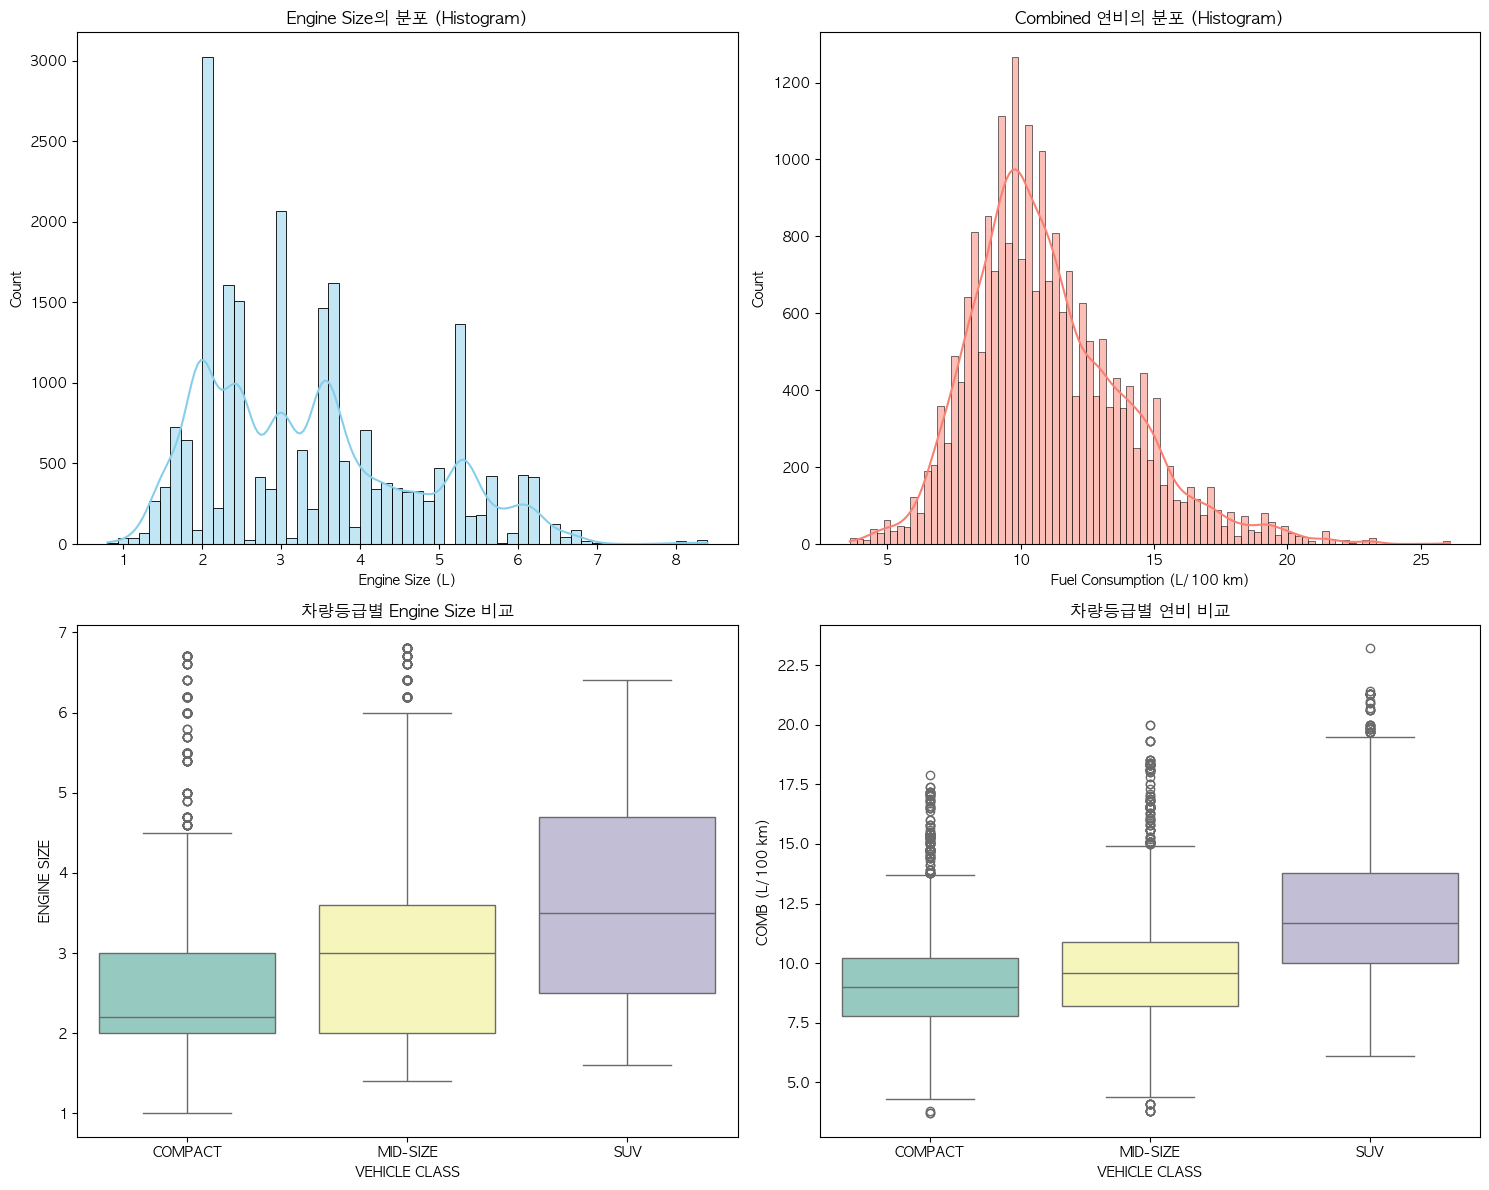

,ENGINE SIZE,COMB (L/100 km)
VEHICLE CLASS,,
COMPACT,1.078633,2.060390
MID-SIZE,1.194977,2.395101
SUV,1.198494,2.705243


변동계수를 제외한 산포 측정에서 모두 연비의 산포도가 더 높게 나타났다.
엔진 크기와 연비 모두 SUV 등급에서 표준편차가 가장 높게 나타나, 해당 등급 내 차량 간의 성능 차이가 가장 큼을 확인했다.


In [46]:
# TODO 1: 두 변수의 산포 측도 계산
data = df[['COMB (L/100 km)', 'ENGINE SIZE']]
print('분산')
print(data.var(ddof=0))
print('\n표준편차')
print(data.std(ddof=0))
print('\n범위(max-min)')
print(data.max() - data.min())
print('\nIQR')
Q1 = data.quantile(0.25)
Q2 = data.quantile(0.5)
Q3 = data.quantile(0.75)
print(Q3 - Q1) 

# TODO 2: 변동계수(CV) 계산
print('\nCV')
print(data.std(ddof=0) / data.mean())

# TODO 3: 이상치 탐지 (IQR, Z-score)
IQR = Q3 - Q1
iqr_lower = Q1 - 1.5 * IQR
iqr_upper = Q3 + 1.5 * IQR
iqr_outliers = data[(data < iqr_lower) | (data > iqr_upper)]
print('IQR 이상치 개수:', len(iqr_outliers))

z_scores = (data - data.mean()) / data.std()
z_outliers_2 = data[np.abs(z_scores) > 2]
z_outliers_3 = data[np.abs(z_scores) > 3]
print('\n|Z_score| > 2 이상치 개수:', len(z_outliers_2))
print('|Z_score| > 3 이상치 개수:', len(z_outliers_3))

# TODO 4: 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.histplot(data['ENGINE SIZE'], kde=True, color='skyblue')
plt.title('Engine Size의 분포 (Histogram)')
plt.xlabel('Engine Size (L)')

plt.subplot(2, 2, 2)
sns.histplot(data['COMB (L/100 km)'], kde=True, color='salmon')
plt.title('Combined 연비의 분포 (Histogram)')
plt.xlabel('Fuel Consumption (L/100 km)')

df_plot = df.copy()
df_plot = df_plot[df_plot['VEHICLE CLASS'].isin(target)]

plt.subplot(2, 2, 3)
sns.boxplot(x='VEHICLE CLASS', y='ENGINE SIZE', data=df_plot, order=target, palette='Set3')
plt.title('차량등급별 Engine Size 비교')

# 4. 차량등급별 COMB (L/100 km) 박스플롯
plt.subplot(2, 2, 4)
sns.boxplot(x='VEHICLE CLASS', y='COMB (L/100 km)', data=df_plot, order=target, palette='Set3')
plt.title('차량등급별 연비 비교')

plt.tight_layout()
plt.show()

# TODO 5: 차량등급별(COMPACT, MID-SIZE, SUV) 표준편차 비교
class_std_comp = df_plot.groupby('VEHICLE CLASS')[['ENGINE SIZE', 'COMB (L/100 km)']].std()
display(class_std_comp)

# TODO 6: 결과 해석
print('변동계수를 제외한 산포 측정에서 모두 연비의 산포도가 더 높게 나타났다.')
print('엔진 크기와 연비 모두 SUV 등급에서 표준편차가 가장 높게 나타나, 해당 등급 내 차량 간의 성능 차이가 가장 큼을 확인했다.')

,Skewness (왜도),Kurtosis (첨도)
ENGINE SIZE,0.6313,-0.3949
COMB (L/100 km),0.8171,1.0546
COMB (mpg),1.1728,3.6436
EMISSIONS,0.5346,0.6154


ENGINE SIZE : 왜도가 낮아 비교적 고르게 분포하지만, 첨도가 음수라 정규분포보다 완만하고 넓게 퍼져 있음
COMB (L/100 km) : 오른쪽으로 꼬리가 길며, 정규분포보다 중앙이 다소 뾰족함
COMB (mpg) : 왜도와 첨도가 가장 높음. 데이터가 왼쪽으로 크게 쏠려 있음
EMISSIONS : 적당한 비대칭성과 완만한 뾰족함을 가짐


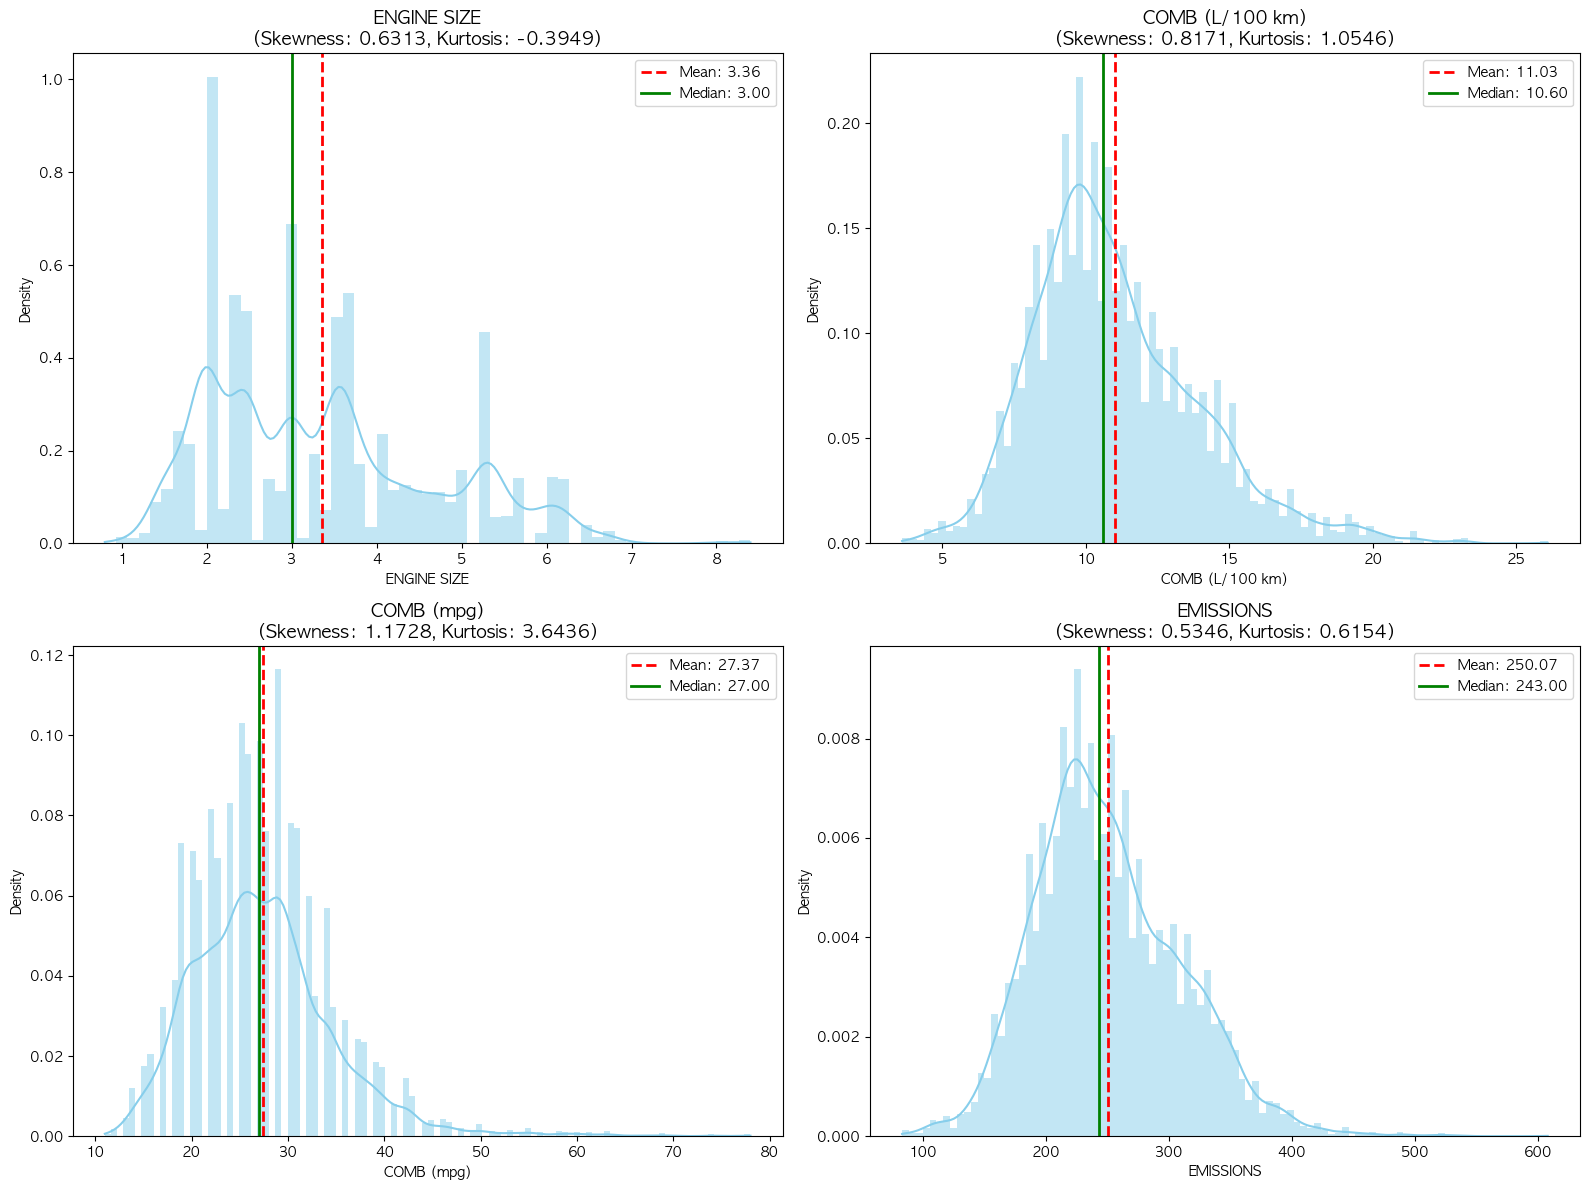

,평균,중앙값,왜도,첨도
FUEL,,,,
D,230.31,246.0,-0.37,-1.04
E,270.58,275.0,-0.19,-0.26
N,312.85,319.0,-1.85,3.07
X,240.28,232.0,0.33,-0.29
Z,260.57,248.0,1.00,1.61


디젤 : 왼쪽 꼬리 분포
에탄올 : 왜도 첨도가 모두 0에 가까움
천연가스 : 왼쪽 꼬리 분포. 첨도가 특정 구간에 매우 밀집되어있음
일반 가솔린 : 오른쪽 꼬리 분포
고급 가솔린 : 오른쪽 꼬리 분포


In [54]:
numeric_cols = ['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

# TODO 1: 왜도/첨도 계산
skewness = df[numeric_cols].skew()
kurtosis = df[numeric_cols].kurt()

# TODO 2: 결과 DataFrame 정리 (왜도/첨도 해석 컬럼 포함)
skew_kurt_df = pd.DataFrame({
    'Skewness (왜도)': skewness,
    'Kurtosis (첨도)': kurtosis
})
display(skew_kurt_df.round(4))
print('ENGINE SIZE : 왜도가 낮아 비교적 고르게 분포하지만, 첨도가 음수라 정규분포보다 완만하고 넓게 퍼져 있음')
print('COMB (L/100 km) : 오른쪽으로 꼬리가 길며, 정규분포보다 중앙이 다소 뾰족함')
print('COMB (mpg) : 왜도와 첨도가 가장 높음. 데이터가 왼쪽으로 크게 쏠려 있음')
print('EMISSIONS : 적당한 비대칭성과 완만한 뾰족함을 가짐')

# TODO 3: 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시, 평균/중앙값 수직선)
plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    
    # 1. 통계량 계산
    skew_val = df[col].skew()
    kurt_val = df[col].kurt()
    mean_val = df[col].mean()
    median_val = df[col].median()
    
    # 2. 히스토그램 + KDE 그리기
    sns.histplot(df[col], kde=True, color='skyblue', stat="density", linewidth=0)
    
    # 3. 평균(빨강) 및 중앙값(초록) 수직선 표시
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    
    # 4. 제목 및 레이블 설정 (왜도/첨도 포함)
    plt.title(f'{col}\n(Skewness: {skew_val:.4f}, Kurtosis: {kurt_val:.4f})', fontsize=13)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

# TODO 4: 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
fuel_type_df = df.groupby('FUEL')['EMISSIONS'].agg([
    ('평균', 'mean'),
    ('중앙값', 'median'),
    ('왜도', 'skew'),
    ('첨도', 'kurt')
])
display(fuel_type_df.round(2))

# TODO 5: 결과 해석
print('디젤 : 왼쪽 꼬리 분포')
print('에탄올 : 왜도 첨도가 모두 0에 가까움')
print('천연가스 : 왼쪽 꼬리 분포. 첨도가 특정 구간에 매우 밀집되어있음')
print('일반 가솔린 : 오른쪽 꼬리 분포')
print('고급 가솔린 : 오른쪽 꼬리 분포')